<a href="https://colab.research.google.com/github/SarvinSaravi/computer-vision-samples/blob/main/Denoising_Autoencoder(DAE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:

import torch.utils.data
from torchvision import datasets, transforms
import numpy as np
import pandas as pd

from torch import nn, optim

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Define Dataloader
(Need VPN)

In [4]:
from torch.utils.data import DataLoader

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize(0, 1)])
# Load the MNIST dataset
mnist_dataset_train = datasets.MNIST(
    root='./data', train=True, download=True, transform=transform)
# Load the test MNIST dataset
mnist_dataset_test = datasets.MNIST(
    root='./data', train=False, download=True, transform=transform)

batch_size = 128
train_loader = torch.utils.data.DataLoader(
    mnist_dataset_train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    mnist_dataset_test, batch_size=5, shuffle=False)


Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 499kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.27MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Define the Model

In [5]:
class DAE(nn.Module):
	def __init__(self):
		super().__init__()

		self.fc1 = nn.Linear(784, 512)
		self.fc2 = nn.Linear(512, 256)
		self.fc3 = nn.Linear(256, 128)

		self.fc4 = nn.Linear(128, 256)
		self.fc5 = nn.Linear(256, 512)
		self.fc6 = nn.Linear(512, 784)

		self.relu = nn.ReLU()
		self.sigmoid = nn.Sigmoid()

	def encode(self, x):

		h1 = self.relu(self.fc1(x))
		h2 = self.relu(self.fc2(h1))
		return self.relu(self.fc3(h2))

	def decode(self, z):
		h4 = self.relu(self.fc4(z))
		h5 = self.relu(self.fc5(h4))
		return self.sigmoid(self.fc6(h5))

	def forward(self, x):
		q = self.encode(x.view(-1, 784))

		return self.decode(q)


# Define the train function

Also add noise (we are passing a noisy input to the encoder by adding *gaussian noise*)

Prints the training progress every 100 batches.

In [6]:
def train(epoch, model, train_loader, optimizer, cuda=True):
	model.train()
	train_loss = 0
	for batch_idx, (data, _) in enumerate(train_loader):
		data.to(device)
		optimizer.zero_grad()

		data_noise = torch.randn(data.shape).to(device)
		data_noise = data + data_noise

		recon_batch = model(data_noise.to(device))
		loss = criterion(recon_batch, data.view(data.size(0), -1).to(device))
		loss.backward()

		train_loss += loss.item() * len(data)
		optimizer.step()

		if batch_idx % 100 == 0:
			print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(data), len(train_loader.dataset),
																		100. * batch_idx /
																		len(train_loader),
																		loss.item()))

	print('====> Epoch: {} Average loss: {:.4f}'.format(
		epoch, train_loss / len(train_loader.dataset)))


# Define model, optimizer, and loss function

Initiate the model

Set the Optimizer (Adam optimizer) + The learning rate is set to 1e-2 (0.01)

Consider Mean Squared Error (MSE) as loss function.
Another loss was Binary Cross-Entropy (log-loss)

In [7]:
epochs = 10

model = DAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-2)
criterion = nn.MSELoss()


# Train the model

In [8]:
for epoch in range(1, epochs + 1):
	train(epoch, model, train_loader, optimizer, True)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.231421
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.053573
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.051850
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.048457
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.041757
====> Epoch: 1 Average loss: 0.0519
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.041968
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.039399
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.040853
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.037309
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.039329
====> Epoch: 2 Average loss: 0.0407
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.039079
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.039143
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.039880
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.041133
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.038393
====> Epoch: 3 Average loss: 0.0391
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.035678
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.040306
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.036403
Train Epoch:

# Performance of the model

take 5 data samples from our test data loader add noise to it and pass it through our model.

 Image 0 with label 7			  Image 1 with label 2			  Image 2 with label 1			  Image 3 with label 0			  Image 4 with label 4			 

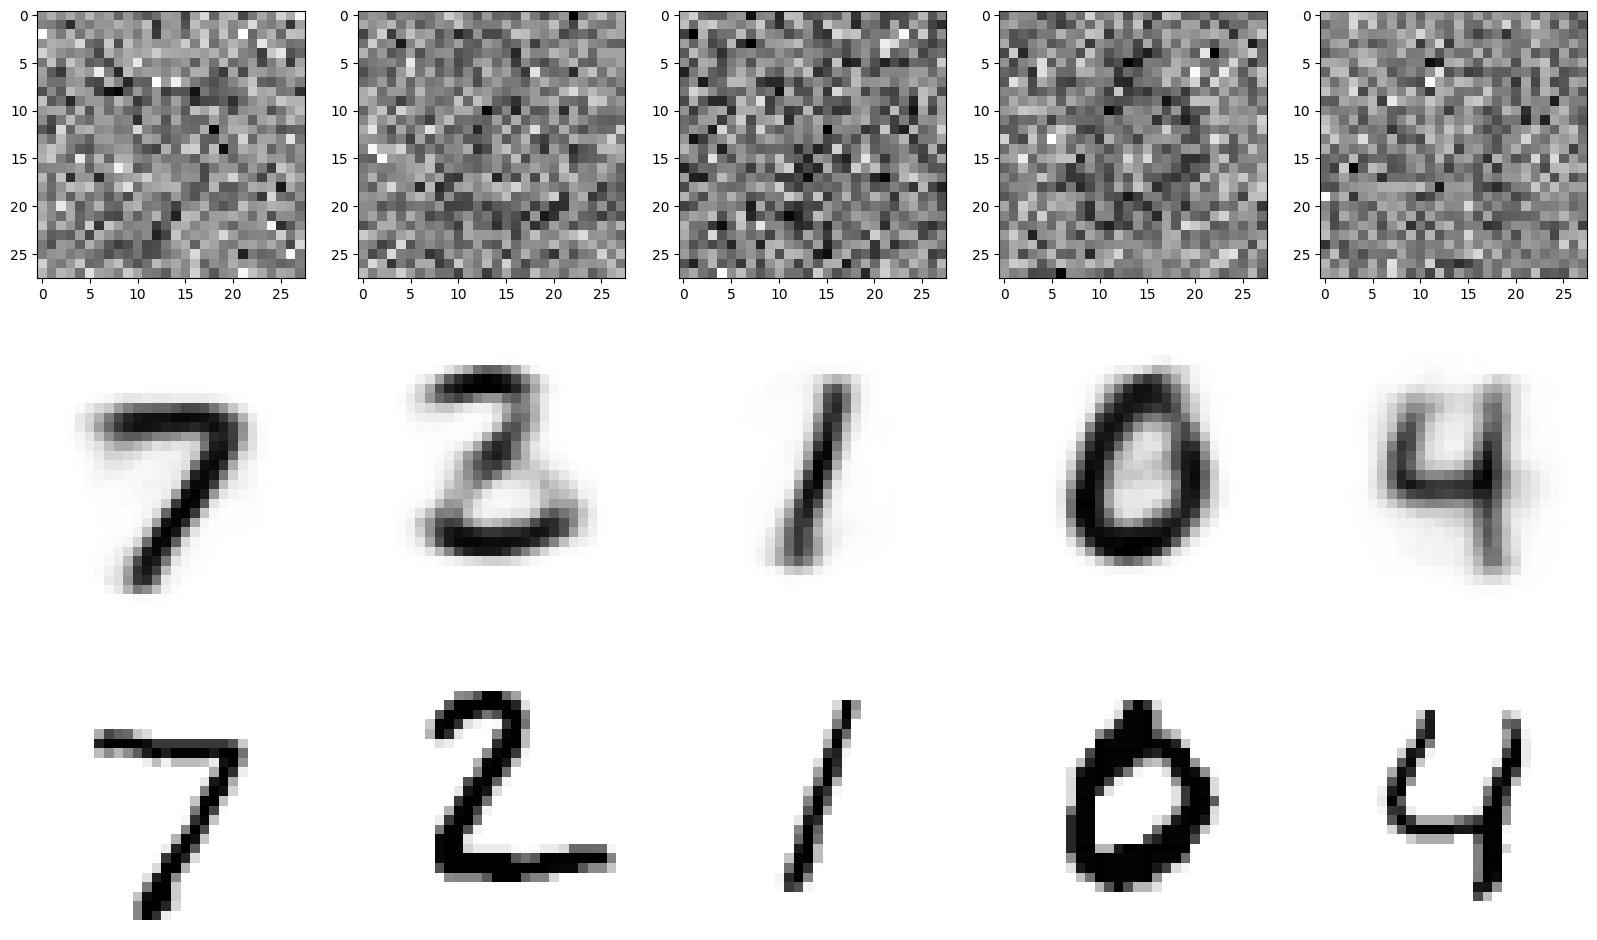

In [9]:
import matplotlib.pyplot as plt

for batch_idx, (data, labels) in enumerate(test_loader):
	data.to(device)
	optimizer.zero_grad()

	data_noise = torch.randn(data.shape).to(device)
	data_noise = data + data_noise

	recon_batch = model(data_noise.to(device))
	break


plt.figure(figsize=(20, 12))
for i in range(5):

	print(f" Image {i} with label {labels[i]}			 ", end="")
	plt.subplot(3, 5, 1+i)
	plt.imshow(data_noise[i, :, :, :].view(
		28, 28).detach().numpy(), cmap='binary')
	plt.subplot(3, 5, 6+i)
	plt.imshow(recon_batch[i, :].view(28, 28).detach().numpy(), cmap='binary')
	plt.axis('off')
	plt.subplot(3, 5, 11+i)
	plt.imshow(data[i, :, :, :].view(28, 28).detach().numpy(), cmap='binary')
	plt.axis('off')
plt.show()


*   The first row is the corrupted image
*   The second row is the reconstructed image
*   The last row is the actual image before addition of noise

